In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 7 ##

## Census ##
Review table skills. 
Create a simplified table. 

In [2]:
#Import all census data.
full = Table.read_table('nc-est2019-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


In [3]:
# Keep only the columns sex, age, 2014 estimate, and the 2019 estimate.
partial = full.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
partial

SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


In [4]:
# Change the column title so they are easier to read. 
simple = partial.relabeled(2, '2014').relabeled(3, '2019')
simple

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


## Line Plots ##
Define a line plot



In [6]:
# Remove the age totals
no_999 = simple.where('AGE', are.below(999))
no_999

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


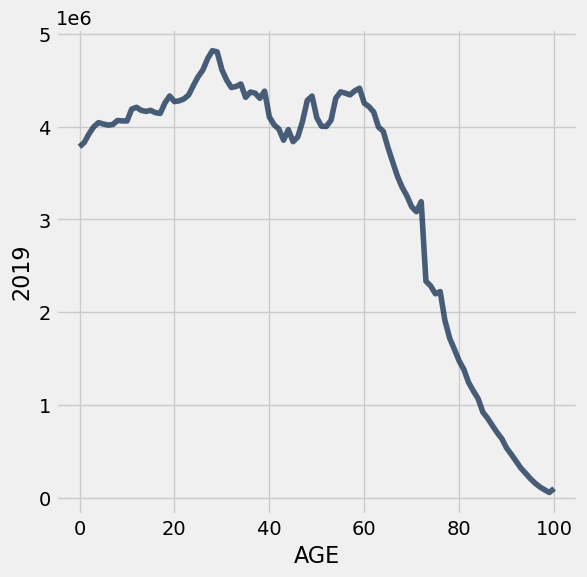

In [7]:
# Creat a line chart of the ages excluding the total category
overall = no_999.where('SEX', 0)
overall.plot('AGE', '2019')

#### What does this graph display? ####

#### What do you notice about the axes? ####

In [8]:
#Understanding the plot command.
overall.plot?

Signature:
overall.plot(
    column_for_xticks=None,
    select=None,
    overlay=True,
    width=None,
    height=None,
    **vargs,
)
Docstring:
Plot line charts for the table. Redirects to ``Table#iplot`` for plotly charts if interactive
plots are enabled with ``Table#interactive_plots``

Args:
    column_for_xticks (``str/array``): A column containing x-axis labels

Kwargs:
    overlay (bool): create a chart with one color per data column;
        if False, each plot will be displayed separately.

    show (bool): whether to show the figure if using interactive plots; if false, the figure 
        is returned instead

    vargs: Additional arguments that get passed into `plt.plot`.
        See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
        for additional arguments that can be passed into vargs.
Raises:
    ValueError -- Every selected column must be numerical.

Returns:
    Returns a line plot (connected scatter). Each plot is labeled using
    the values 

### ^^ That plot should be labeled! Here are 3 ways to label it: ###


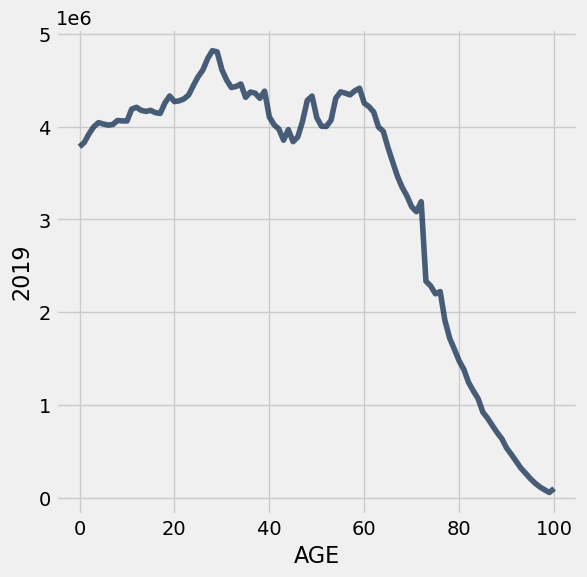

In [9]:
# US Population  <--- Just add a comment

overall.plot('AGE', '2019')

US Population


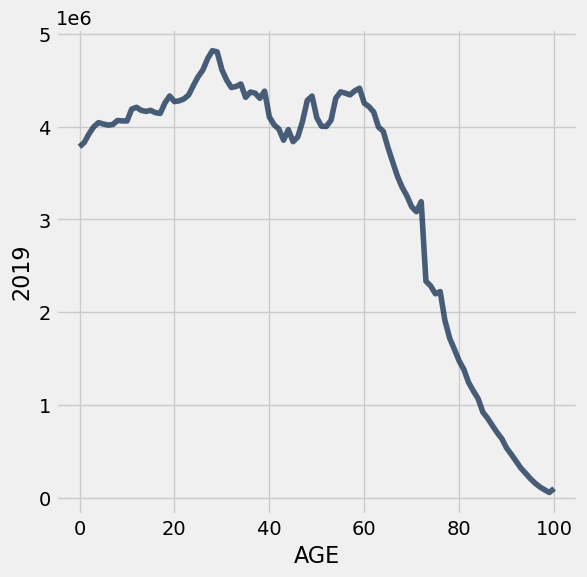

In [10]:
overall.plot('AGE', '2019')
print('US Population')  # <--- Print out what it is

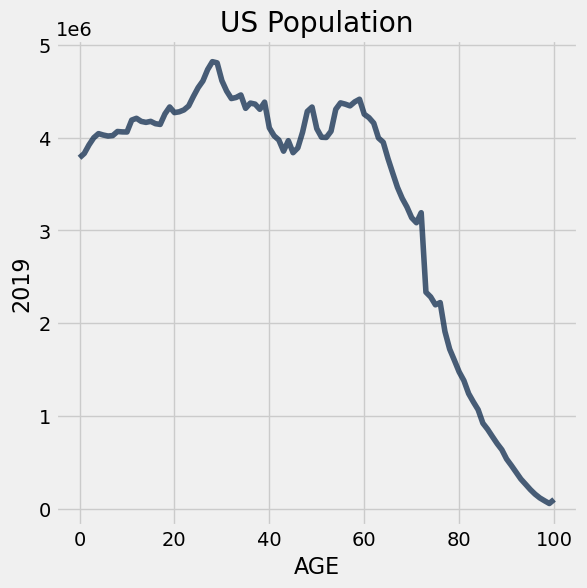

In [11]:
overall.plot('AGE', '2019')
plots.title('US Population');    

Which was your preferred title command and display?

What do you notice about the scale of the axes?

What observations or questions come up when reviewing this data?

### Males vs Females

In [12]:
# Let's compare male and female counts per age
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [13]:
pop_2019 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2019'),
    'Females', females.column('2019')
)
pop_2019

Age,Males,Females
0,1935117,1847935
1,1958585,1871014
2,2005544,1916500
3,2043010,1955655
4,2066951,1976372
5,2061200,1967081
6,2052956,1964271
7,2055735,1966584
8,2079723,1986471
9,2073148,1988726


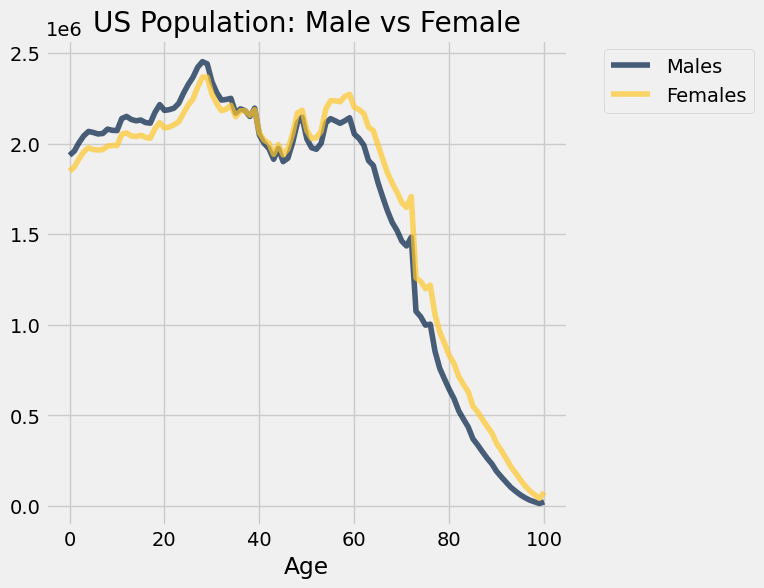

In [14]:
pop_2019.plot('Age')
plots.title("US Population: Male vs Female");

What do you notice about the scale of the axes?

What are some questions or observations you could make about this data?

In [15]:
# Calculate the percent female for each age
total = pop_2019.column('Males') + pop_2019.column('Females')
pct_female = pop_2019.column('Females') / total * 100
pct_female

array([ 48.84772929,  48.85665575,  48.86482661,  48.90769794,
        48.87989409,  48.83177216,  48.89619133,  48.891796  ,
        48.85332574,  48.96079987,  48.98279709,  48.9638626 ,
        48.91584353,  48.91319525,  48.95759569,  48.99435008,
        49.0132324 ,  49.00202176,  48.95504446,  48.85543937,
        48.86882703,  48.87982978,  48.93202059,  48.82680386,
        48.75770556,  48.75912579,  48.69284051,  48.8521968 ,
        49.12023409,  49.23570746,  49.27026013,  49.32986637,
        49.3410954 ,  49.39558621,  49.56983336,  49.77550276,
        49.88230838,  49.98809984,  50.07964091,  49.90289454,
        50.14599374,  50.21453868,  50.37201166,  50.35627549,
        50.26558532,  50.48105622,  50.6527532 ,  50.58644103,
        50.62378332,  50.44245948,  50.55924807,  50.63152682,
        50.80644073,  50.81350976,  50.89171017,  51.13603295,
        51.27000222,  51.3678543 ,  51.52798838,  51.46621264,
        51.73196183,  51.88924675,  52.0955001 ,  52.30

In [16]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

array([ 48.848,  48.857,  48.865,  48.908,  48.88 ,  48.832,  48.896,
        48.892,  48.853,  48.961,  48.983,  48.964,  48.916,  48.913,
        48.958,  48.994,  49.013,  49.002,  48.955,  48.855,  48.869,
        48.88 ,  48.932,  48.827,  48.758,  48.759,  48.693,  48.852,
        49.12 ,  49.236,  49.27 ,  49.33 ,  49.341,  49.396,  49.57 ,
        49.776,  49.882,  49.988,  50.08 ,  49.903,  50.146,  50.215,
        50.372,  50.356,  50.266,  50.481,  50.653,  50.586,  50.624,
        50.442,  50.559,  50.632,  50.806,  50.814,  50.892,  51.136,
        51.27 ,  51.368,  51.528,  51.466,  51.732,  51.889,  52.096,
        52.307,  52.436,  52.752,  52.906,  53.012,  53.246,  53.251,
        53.387,  53.443,  53.519,  53.96 ,  54.261,  54.583,  54.837,
        55.269,  55.825,  56.165,  56.372,  57.035,  57.645,  58.29 ,
        59.117,  59.773,  60.625,  61.505,  62.424,  63.419,  64.354,
        65.55 ,  66.583,  67.762,  69.012,  70.064,  70.758,  72.12 ,
        72.672,  74.

In [17]:
# Add female percent to our table
pop_2019 = pop_2019.with_column('Percent female', pct_female)
pop_2019

Age,Males,Females,Percent female
0,1935117,1847935,48.848
1,1958585,1871014,48.857
2,2005544,1916500,48.865
3,2043010,1955655,48.908
4,2066951,1976372,48.88
5,2061200,1967081,48.832
6,2052956,1964271,48.896
7,2055735,1966584,48.892
8,2079723,1986471,48.853
9,2073148,1988726,48.961


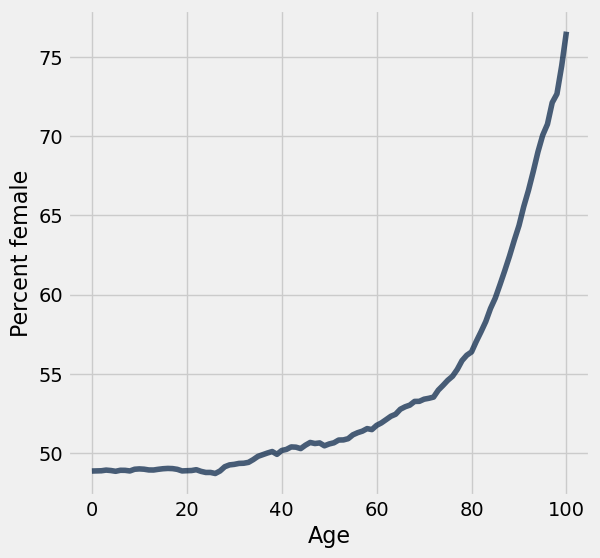

In [18]:
pop_2019.plot('Age', 'Percent female')

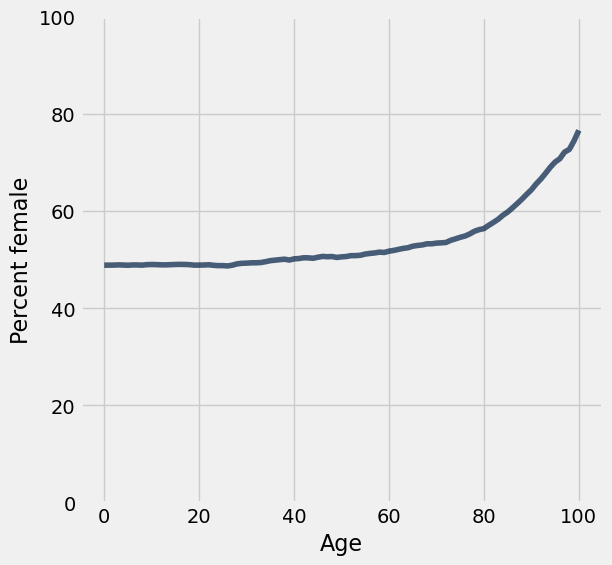

In [19]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think

pop_2019.plot('Age', 'Percent female')
plots.ylim(0, 100);  # Optional for Data 8

Compare the two displays: Why do you think the program automatically zooms in?

What observations or questions can be formed about this data?

## Scatter Plots ##

Define a scatter plot.

In [21]:
# Import Actors and their highest grossing movies data.
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


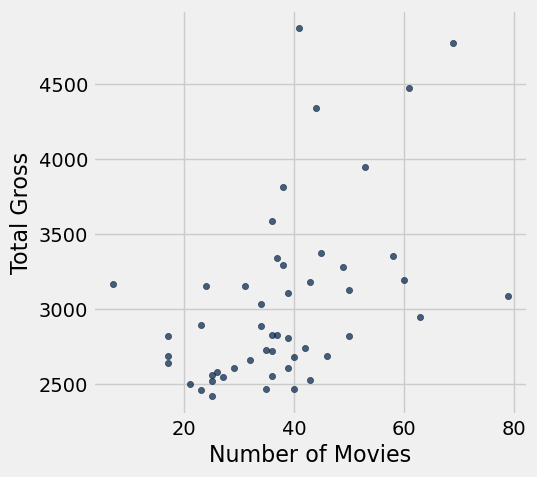

In [22]:
actors.scatter('Number of Movies', 'Total Gross')

What observations can be made from comparing the two variables?

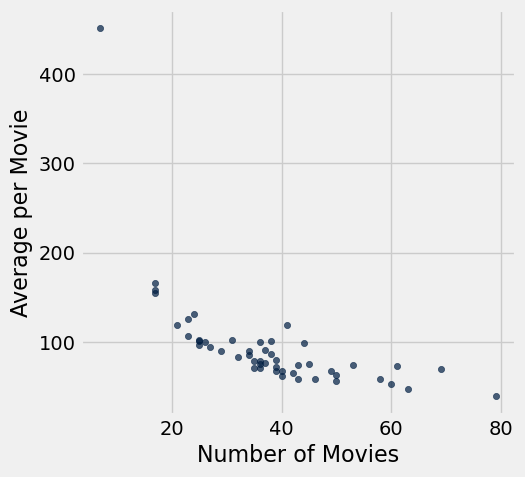

In [23]:
actors.scatter('Number of Movies', 'Average per Movie')


What observations can be made from comparing the two variables?

In [24]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


Who is Anthony Daniels and why did he make so much for so few movies?

## Bar Charts ##
Define Bar Charts

In [25]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [26]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [27]:
# Convert Adjusted Gross to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


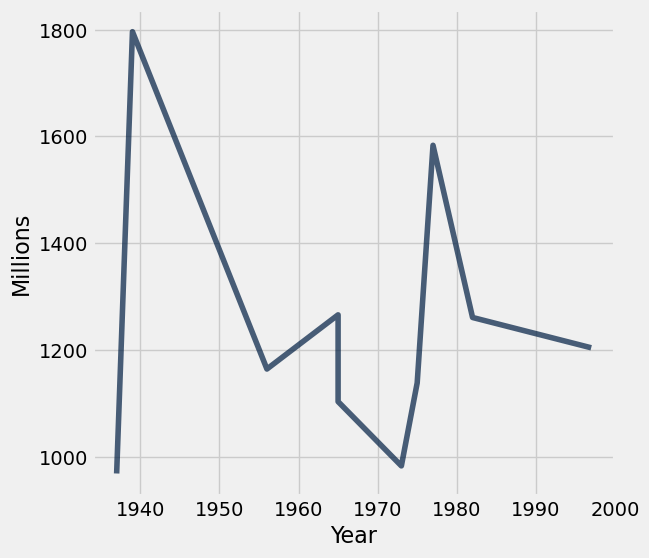

In [28]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

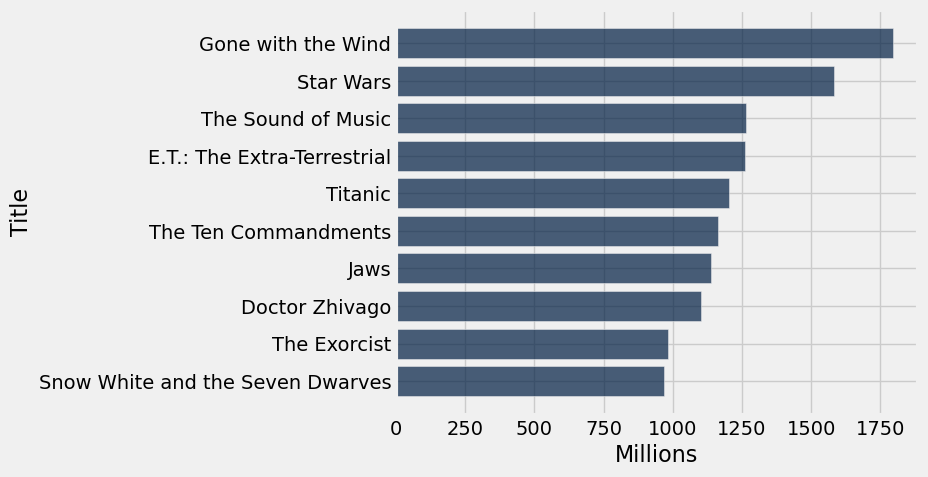

In [29]:
top10_adjusted.barh('Title', 'Millions')

Exercise: Generate the chart shown below: a bar chart of age (# years since release) for the 10 highest grossing movies (non-adjusted).
    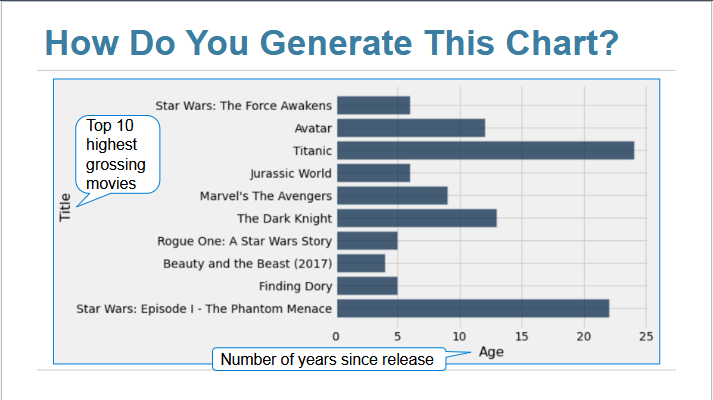

In [ ]:
# Use the Year column to find the age of the movie, then add that column to the top10_adjusted table.

In [ ]:
# Create a horizontal bar chart that displays the age of the movies